In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

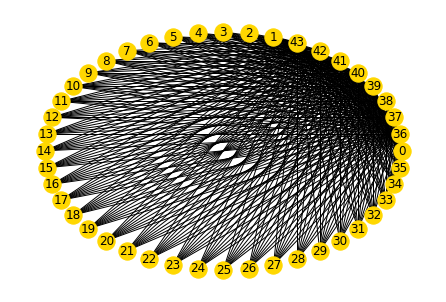

In [2]:
visible = [i for i in range(36)]
hidden = [36 + j for j in range(8)]
edges = [(i, j) for i in visible for j in hidden]

G = nx.Graph()
G.add_edges_from(edges)
nx.draw_circular(G, with_labels=True, node_color='gold')

In [3]:
from active_coresets.QBM import QuantumBoltzmannMachine

2022-02-22 23:54:40.578122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-22 23:54:40.578170: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
base_qbm = QuantumBoltzmannMachine(G, visible, hidden, 2)
data_dist = base_qbm.sample(500)

2022-02-22 23:54:45.133487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-22 23:54:45.133644: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-22 23:54:45.133681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-02-22 23:54:45.133709: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-02-22 23:54:45.140336: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [5]:
v_data = data_dist[:,:36]

In [25]:
import importlib
import active_coresets
importlib.reload(active_coresets.QBM)
importlib.reload(active_coresets.qmc_tim_qbm)
from active_coresets.QBM import QuantumBoltzmannMachine

In [6]:
qbm_disc = QuantumBoltzmannMachine(G, visible, hidden, 2)
qbm_disc.classical_train_disc(v_data, 1, batch_size=50, epochs=1)

Epoch 1/1:
....Batch: 1/10
....Batch: 2/10
....Batch: 3/10
....Batch: 4/10
....Batch: 5/10
....Batch: 6/10
....Batch: 7/10
....Batch: 8/10
....Batch: 9/10
....Batch: 10/10
Training done!


In [7]:
prediction = qbm_disc.predict(1, v_data[0,:-1])
print(v_data[0])
print(prediction)

[-1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.
  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.]
tf.Tensor([1.], shape=(1,), dtype=float32)


In [31]:
correct = 0
for data in v_data:
    prediction = qbm_disc.predict(1, data[:-1])
    if prediction == data[-1]:
        correct += 1
        print(f'Correct: {correct}')
    else:
        print(f'Incorrect: Prediction: {prediction}, Data: {data[-1]}')